In [ ]:
!gdown --id 1Eq0s7oBP00xkPkAAlBt0nj6lNVFvMkhO

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Eq0s7oBP00xkPkAAlBt0nj6lNVFvMkhO
To: /content/Precooked_pasta.csv
100% 30.8M/30.8M [00:00<00:00, 94.8MB/s]


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Concatenate, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [ ]:
df = pd.read_csv("/content/Precooked_pasta.csv")
df

,Sample_ID,Dry_weight_content_%,Pasta_type_&_phy_con,Phy_con,Pasta_type,350,351,352,353,354,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.273476,0.274664,0.276380,0.278252,0.278817,...,0.029975,0.030175,0.030159,0.029962,0.029791,0.029484,0.029472,0.029682,0.029583,0.029580
1,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.264637,0.265435,0.264751,0.266426,0.266870,...,0.048597,0.048674,0.048668,0.048763,0.048775,0.048688,0.048645,0.048607,0.048330,0.048190
2,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.169046,0.167434,0.169058,0.171890,0.176521,...,0.022955,0.023029,0.023051,0.023055,0.023036,0.023008,0.022918,0.022691,0.022503,0.022539
3,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.251627,0.251486,0.259051,0.262979,0.259674,...,0.040048,0.040046,0.040003,0.039815,0.039703,0.039671,0.039672,0.039642,0.039595,0.039484
4,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.161285,0.164613,0.169598,0.167259,0.168154,...,0.052392,0.052348,0.052389,0.052460,0.052475,0.052550,0.052569,0.052479,0.052492,0.052476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.123408,0.119177,0.113905,0.116624,0.121210,...,0.045335,0.045403,0.045501,0.045496,0.045537,0.045849,0.045793,0.045396,0.045128,0.045112
1196,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.125699,0.121910,0.118119,0.118316,0.117574,...,0.043958,0.043743,0.043659,0.043489,0.043563,0.043944,0.044031,0.044185,0.044124,0.043869
1197,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.113928,0.116862,0.119997,0.113773,0.117905,...,0.045205,0.045057,0.045030,0.044883,0.044854,0.045042,0.045063,0.045013,0.044990,0.045082
1198,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.130362,0.127501,0.128886,0.131551,0.130019,...,0.046510,0.046244,0.046220,0.046381,0.046408,0.046421,0.046486,0.046521,0.046554,0.046563


In [ ]:
spectra = df.values[:,5:]
classes = df.values[:,0:1]

In [ ]:
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(classes)

onehot_encoder = OneHotEncoder(categories='auto')
encoded_classes = onehot_encoder.fit_transform(encoded_classes.reshape(-1, 1)).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spectra, encoded_classes, test_size=0.3, random_state=2)

In [ ]:
def extract_to_pseudo_image(matrix):
    extract_matrix = matrix[:, 0:1]
    for i in range(2, matrix.shape[1], 2):
        extract_matrix = np.concatenate((extract_matrix, matrix[:, i:i+1]), axis=1)
    extract_matrix = extract_matrix[:, 0:1058]
    extract_matrix = extract_matrix.astype(float)
    extract_matrix = tf.convert_to_tensor(extract_matrix)
    extract_matrix = tf.reshape(extract_matrix, (extract_matrix.shape[0], 23, 23, 2))
    return extract_matrix

In [ ]:
X_train = extract_to_pseudo_image(X_train)
X_test = extract_to_pseudo_image(X_test)

y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

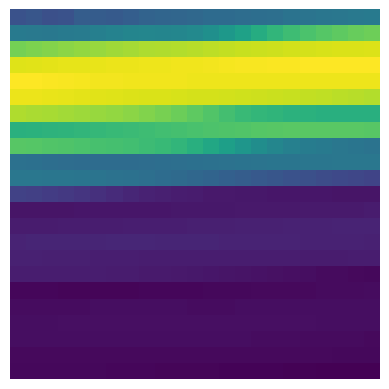

In [ ]:
import matplotlib.pyplot as plt

X_train[0][:,:,0].shape
# Hiển thị hình ảnh từ tensor
plt.imshow(X_train[100][:,:,1])
plt.axis('off')
plt.show()

In [ ]:
def residual_block(x, filters, dropout_rate=0.2, l2_weight=0.001):
    x1 = Conv2D(kernel_size=1, filters=filters, padding="same")(x)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(dropout_rate)(x1)

    x2 = Conv2D(kernel_size=3, filters=filters, padding="same")(x)
    x2 = BatchNormalization()(x2)
    x2 = ReLU()(x2)
    x2 = Conv2D(kernel_size=3, filters=filters, padding="same")(x2)
    x2 = BatchNormalization()(x2)
    x2 = Dropout(dropout_rate)(x2)

    out = Concatenate()([x1, x2])
    out = ReLU()(out)

    return out

def TeaResnet(dropout_rate=0.2, l2_weight=0.001):
    inputs = Input(shape=(23, 23, 2))

    x = Conv2D(kernel_size=7, filters=16, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = residual_block(x, 16, dropout_rate, l2_weight)
    x = residual_block(x, 32, dropout_rate, l2_weight)
    x = residual_block(x, 64, dropout_rate, l2_weight)

    x = GlobalAveragePooling2D()(x)
    x = Dense(24, activation='softmax', kernel_regularizer=l2(l2_weight))(x)

    model = Model(inputs=inputs, outputs=x)
    return model

In [ ]:
model_TeaResnet = TeaResnet()

In [ ]:
optimizer = RMSprop(learning_rate=0.001)
model_TeaResnet.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1)

history = model_TeaResnet.fit(X_train, y_train,
                              epochs=2000,
                              batch_size=32,
                              validation_data=(X_test, y_test),
                              callbacks=[reduce_lr])

Epoch 1/2000
27/27 [==============================] - 6s 38ms/step - loss: 2.8898 - accuracy: 0.1036 - val_loss: 3.2774 - val_accuracy: 0.0417 - lr: 0.0010
Epoch 2/2000
27/27 [==============================] - 0s 18ms/step - loss: 2.5349 - accuracy: 0.1500 - val_loss: 3.6240 - val_accuracy: 0.0417 - lr: 0.0010
Epoch 3/2000
27/27 [==============================] - 0s 15ms/step - loss: 2.3668 - accuracy: 0.2012 - val_loss: 4.7303 - val_accuracy: 0.0417 - lr: 0.0010
Epoch 4/2000
27/27 [==============================] - 0s 15ms/step - loss: 2.2951 - accuracy: 0.2405 - val_loss: 5.5783 - val_accuracy: 0.0417 - lr: 0.0010
Epoch 5/2000
27/27 [==============================] - 0s 15ms/step - loss: 2.2407 - accuracy: 0.2286 - val_loss: 4.8562 - val_accuracy: 0.0333 - lr: 0.0010
Epoch 6/2000
27/27 [==============================] - 0s 15ms/step - loss: 2.2315 - accuracy: 0.2155 - val_loss: 8.3733 - val_accuracy: 0.0389 - lr: 0.0010
Epoch 7/2000
27/27 [==============================] - 0s 14ms/st